In [2]:
import math
import numpy as np
from scipy.integrate import odeint
import scipy as sp
import matplotlib.pyplot as plt


T = 343.15       # Temperature in K
p_atm = 101.325  # Atmospheric pressure in Pa

# Vapor pressure for both compounds 
def p0_me(T):
    #Antonie constants-methanol 
    A_me = 5.20409
    B_me = 1581.341
    C_me = -33.50
    #vapour pressure 
    p0_me = (10**(A_me - B_me/(T+C_me)))*10**5     #Pa
    return p0_me   


def p0_iso(T):
    #Antoine constants isopropanol
    A_iso = 4.8610
    B_iso =	1357.427
    C_iso = -75.814
    #vapour pressure 
    p0_iso = (10**(A_iso - B_iso/(T+C_iso)))*10**5    #Pa
    return p0_iso


In [3]:
R = 8.3144598          # Gas constant J/molK
A = 5                  # Evaporation surface area m2

# Mass transfer coefficient
k_me = ((1.0020+1.2598)/2)*10**(-7) #m/s 
#k_me = 1
k_iso = ((2.47+3.17)/2)*10**(-10)   #m/s#
#k_iso = 1

In [4]:
params = {
    'A': A,
    'T': T,        # Temperature 
    'R': R,        # Gas constant
    'k_me': k_me,  # mass coefficient methanol,
    'k_iso': k_iso, # mass coefficient isopropanol
    'p_atm': p_atm
}

In [5]:
def modelODE(N,t,params):
    T = params['T']
    A = params['A']
    k_me = params['k_me']
    k_iso = params['k_iso']
    p_atm = params['p_atm']

    Nme_L = N[0]
    Niso_L = N[1]
    Nme_v = N[2]
    Niso_v = N[3]

    #mol fractions 
    y_me = Nme_v/(Niso_v + Nme_v)
    x_me = Nme_L/(Nme_L + Niso_L)
    y_iso = Niso_v/(Niso_v + Nme_v)
    x_iso = Niso_L/(Nme_L + Niso_L)
    
    dNdt = np.zeros(4)
    #dNdt[0] = -k_me*A * ((x_me*p0_me(T) - p_atm*y_me)/(R*T))           #meL
    #dNdt[1] = -k_iso*A * ((x_iso*p0_iso(T) - p_atm*y_iso)/(R*T))       #isoL
    #dNdt[2] = k_me*A * ((x_me*p0_iso(T) - p_atm*y_me)/(R*T))           #meV
    #dNdt[3] = k_iso*A * ((x_iso*p0_me(T) - p_atm*y_iso)/(R*T))         #isoV
    
    dNdt[0] = -k_me*A * ((x_me*p0_me(T) - p_atm*y_me)/(R*T))            #meL
    dNdt[1] = -k_iso*A * ((x_iso*p0_iso(T) - p_atm*y_iso)/(R*T))        #isoL 
    dNdt[2] = -dNdt[0]                                                  #meV
    dNdt[3] = -dNdt[1]                                                  #isoV  
    
    return dNdt

In [8]:
N0 = [1, 1 , 0.001, 0.001] # meL isoL meV isoV
tspan = np.linspace(0, 36000, 1000)
N = sp.integrate.odeint(modelODE, N0, tspan, args = (params,))

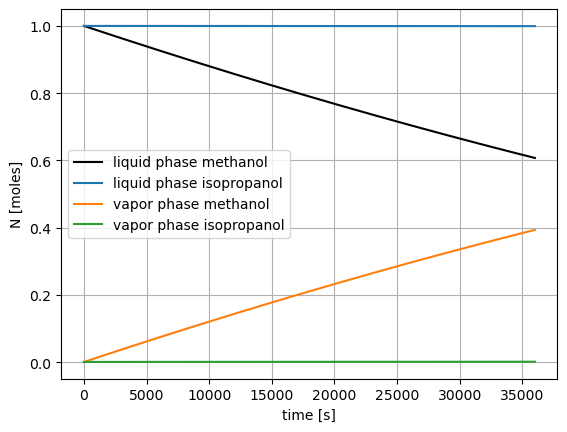

In [10]:
plt.plot(tspan, N[:,0], 'k',  label = 'liquid phase methanol')
plt.plot(tspan, N[:,1], label = 'liquid phase isopropanol')
plt.plot(tspan, N[:,2], label = 'vapor phase methanol')
plt.plot(tspan, N[:,3], label = 'vapor phase isopropanol')
plt.xlabel("time [s]")
plt.ylabel("N [moles]")
plt.grid()
plt.legend()
plt.show()